<a href="https://colab.research.google.com/github/tranletuhien/Tu-Hien/blob/main/CNN_Dishes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# kết nối với Google Drive trong môi trường Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#tải tập dữ liệu hình ảnh, chuyển đổi chúng thành mảng NumPy,
#và lưu các mảng này vào đĩa để sử dụng trong quá trình đào tạo hoặc kiểm tra mô hình.
from os import listdir
from numpy import asarray, save
from keras.utils import load_img
from keras.utils import img_to_array


In [4]:
#import thư viện
import keras
from keras.preprocessing.image import ImageDataGenerator

train_data=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_data= ImageDataGenerator(rescale = 1./255)

training_set=train_data.flow_from_directory('/content/drive/MyDrive/Dishes/Train',target_size=(300,300), batch_size=32, class_mode='categorical')


training_set.class_indices

Found 2865 images belonging to 10 classes.


{'banh_bo': 0,
 'banh_bot_loc': 1,
 'banh_cong': 2,
 'banh_da_lon': 3,
 'banh_khot': 4,
 'banh_mi': 5,
 'banh_tai_heo': 6,
 'banh_tieu': 7,
 'banh_trung_thu': 8,
 'banh_xeo': 9}

In [5]:
#tạo mô hình CNN sủ dụng tuần tự
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout,Flatten,Conv2D, MaxPooling2D, Normalization         #dense :full conected ANN
from keras.layers import LeakyReLU
from keras.optimizers import Adam
model = Sequential()
model.add(Conv2D(32,kernel_size = (3,3),activation = 'linear',input_shape=(300,300,3),padding = 'same'))                                                          #32 lần tích chập đầu tiên
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2),padding = 'same'))

model.add(Conv2D(64,(3,3),activation = 'linear',padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2),padding = 'same'))

model.add(Conv2D(128,(3,3),activation = 'linear',padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2),padding = 'same'))

model.add(Conv2D(256,(3,3),activation = 'linear',padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2),padding = 'same'))




#CNN
model.add(Flatten())   # flatten làm phẳng ảnh
model.add(Dense(256,activation = 'linear'))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(10,activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 300, 300, 32)      896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 300, 300, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 150, 150, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 64)      18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 150, 150, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 75, 75, 64)       0         
 2D)                                                    

In [11]:
model.compile(loss ='categorical_crossentropy', optimizer='Adam',  metrics = ['accuracy'])   # Adam tốc độ học 0.1
train = model.fit(training_set, epochs= 10 , batch_size= 512,verbose= 1)

Epoch 1/10
90/90 [==============================] - 98s 1s/step - loss: 0.6417 - accuracy: 0.7735
Epoch 2/10
90/90 [==============================] - 94s 1s/step - loss: 0.5011 - accuracy: 0.8318
Epoch 3/10
90/90 [==============================] - 94s 1s/step - loss: 0.4626 - accuracy: 0.8527
Epoch 4/10
90/90 [==============================] - 94s 1s/step - loss: 0.3712 - accuracy: 0.8716
Epoch 5/10
90/90 [==============================] - 93s 1s/step - loss: 0.3523 - accuracy: 0.8820
Epoch 6/10
90/90 [==============================] - 94s 1s/step - loss: 0.3409 - accuracy: 0.8908
Epoch 7/10
90/90 [==============================] - 93s 1s/step - loss: 0.3267 - accuracy: 0.8932
Epoch 8/10
90/90 [==============================] - 93s 1s/step - loss: 0.2497 - accuracy: 0.9260
Epoch 9/10
90/90 [==============================] - 94s 1s/step - loss: 0.2657 - accuracy: 0.9134
Epoch 10/10
90/90 [==============================] - 94s 1s/step - loss: 0.2970 - accuracy: 0.9058


In [12]:
#Lưu
from keras.models import load_model
model.save("/content/drive/MyDrive/Dishes/food.h5")
model_1=load_model('/content/drive/MyDrive/Dishes/food.h5')


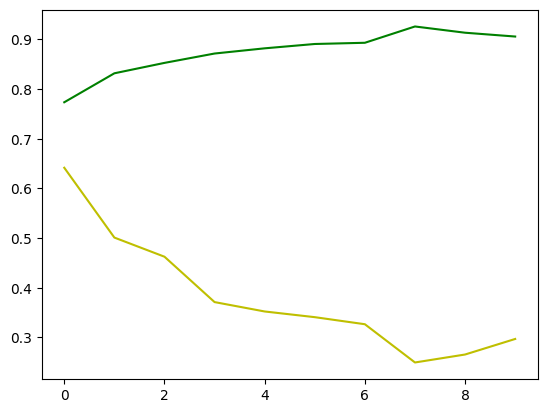

In [13]:
import matplotlib.pyplot as plt      
accuracy = train.history['accuracy']
loss = train.history['loss']    # VẼ ĐỒ THỊ SỬ MẤT MÁT VÀ ĐỘ HỌC TẬP CHÍNH XÁC CỦA BÀI KIỂM TRA
epochs = range(len(accuracy))
plt.plot(epochs,accuracy,'g',label = 'Training accuracy')
plt.plot(epochs,loss,'y',label = 'Training loss')
plt.show()

1/1 [==============================] - 0s 118ms/step
Banh cuon


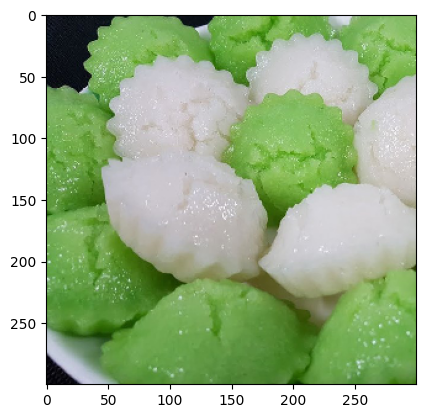

1/1 [==============================] - 0s 23ms/step
Banh cuon


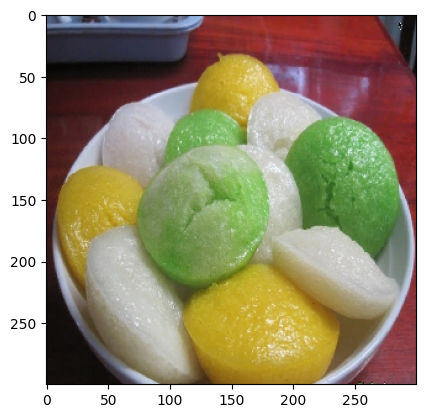

1/1 [==============================] - 0s 21ms/step
Banh mi


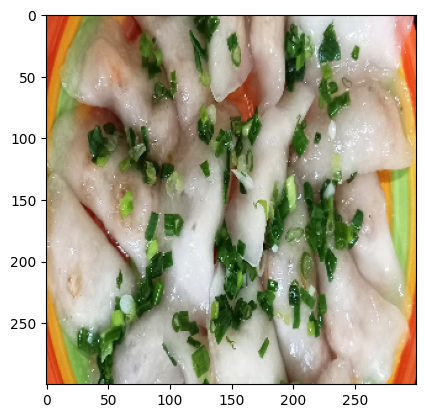

1/1 [==============================] - 0s 22ms/step
Banh mi


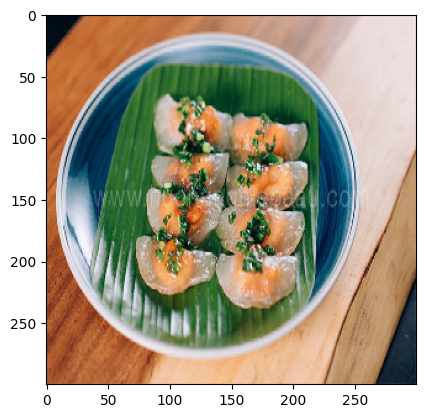

1/1 [==============================] - 0s 42ms/step
Banh cuon


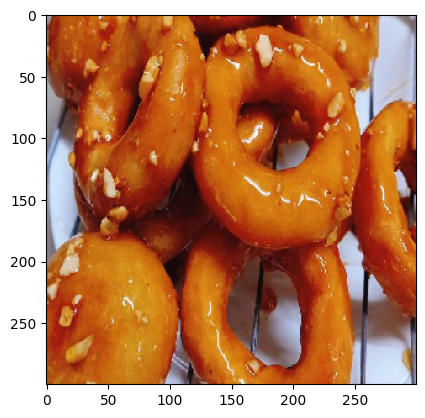

1/1 [==============================] - 0s 31ms/step
Banh da bo


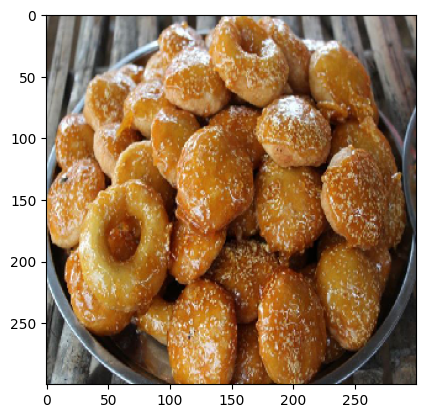

1/1 [==============================] - 0s 27ms/step
Banh cuon


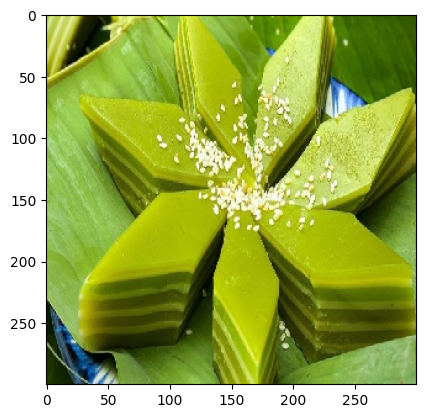

1/1 [==============================] - 0s 30ms/step
Bánh tet


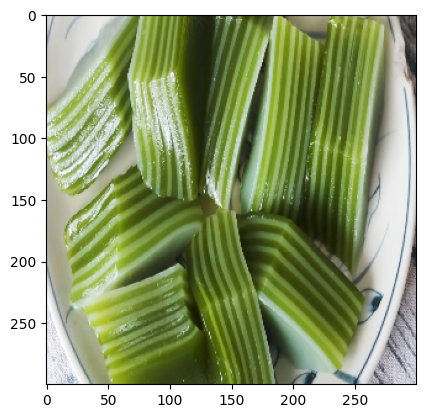

1/1 [==============================] - 0s 19ms/step
Bánh xèo


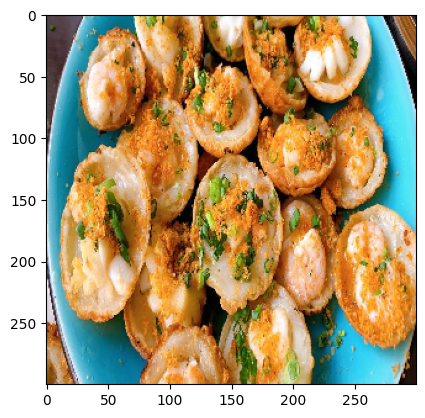

1/1 [==============================] - 0s 46ms/step
Banh da bo


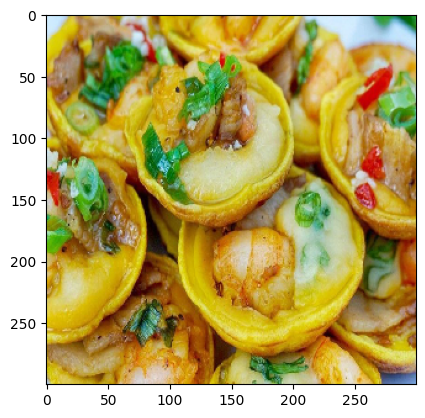

1/1 [==============================] - 0s 64ms/step
Pho


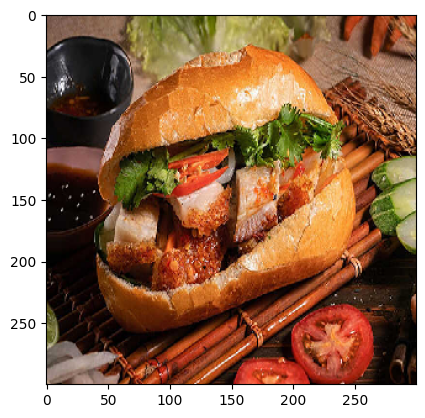

1/1 [==============================] - 0s 32ms/step
Banh da bo


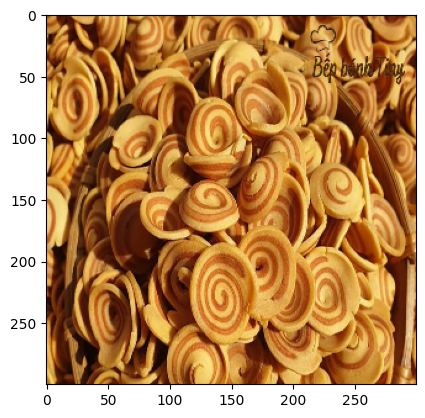

1/1 [==============================] - 0s 29ms/step
Banh da bo


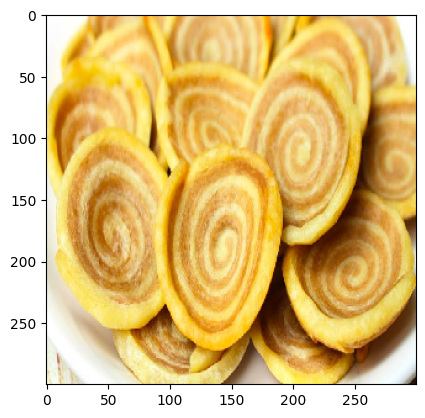

1/1 [==============================] - 0s 27ms/step
Com tam


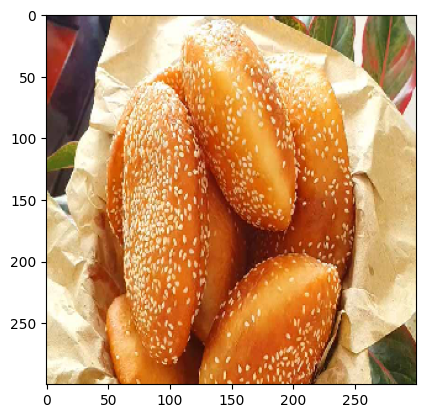

1/1 [==============================] - 0s 30ms/step
Com tam


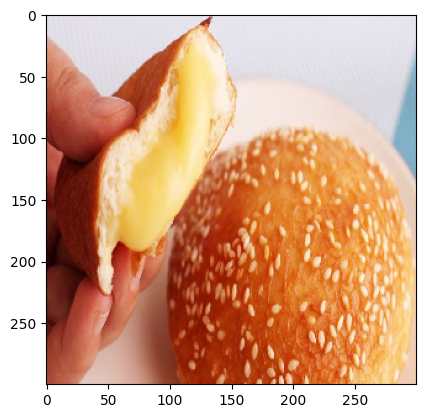

1/1 [==============================] - 0s 38ms/step
Banh bo


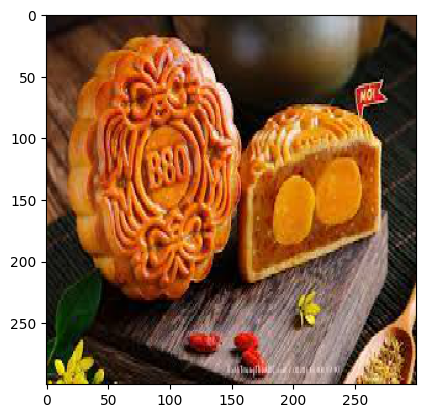

1/1 [==============================] - 0s 36ms/step
Banh trung thu


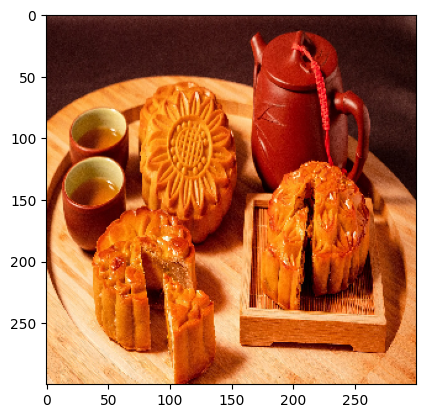

1/1 [==============================] - 0s 43ms/step
Banh trung thu


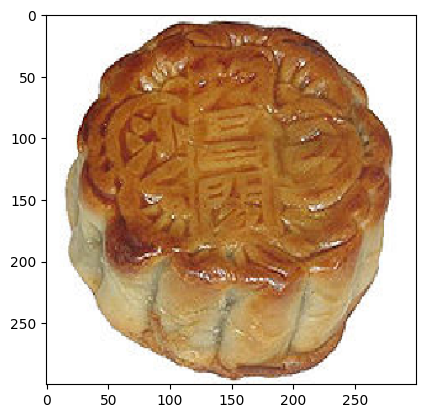

1/1 [==============================] - 0s 33ms/step
Banh bot loc


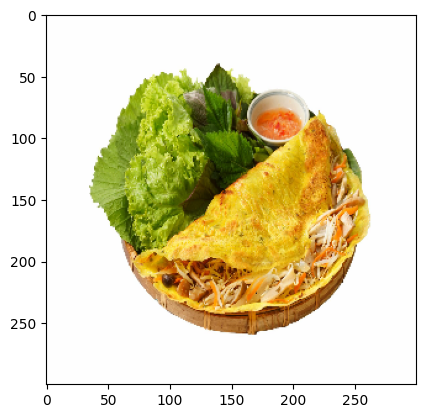

1/1 [==============================] - 0s 35ms/step
Banh bot loc


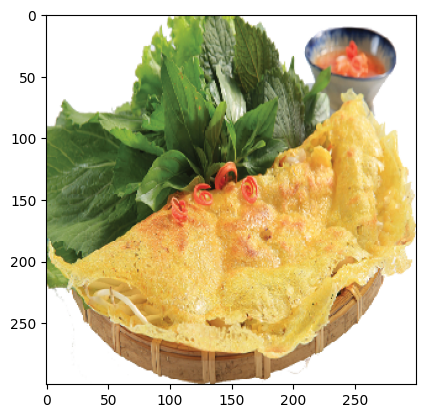

In [14]:
from keras.models import load_model
from keras.utils import load_img, img_to_array
import os
import numpy as np 
test='/content/drive/MyDrive/Dishes/Test'
for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(300,300))
  plt.imshow(img)
  img=img_to_array(img) 
  img=img.astype('float32') 
  img=img/255 
  img=np.expand_dims(img,axis=0)
  result=(model_1.predict(img).argmax()) 
  class_name=['Banh cuon','Banh mi','Banh bo','Bánh tet','Bánh xèo', 'Pho','Banh da bo','Com tam','Banh trung thu','Banh bot loc']
  print(class_name[result]) 
  plt.show()